In [1]:
# import needed modules,still need to add PCA and all the stats machinery
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
# import dataset
df_excel = pd.read_excel("projetprog.xlsx", header = None)
df1 = df_excel.to_csv('projetprog.csv', index = None, header = False)
df = pd.read_csv('projetprog.csv')
df = df.iloc[:,:]
#df = df.drop(df['Unnamed:0']) #ça c'était pour enlever la colonne unnamed mais ça marche po 
df

,Unnamed: 0,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,UNDER18,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE
0,0.0,[75.000-,F,Married,45-54,1 to 3 years of college,Homemaker,10+ years,No,Three,None,Own,House,White,NaN
1,1.0,[75.000-,M,Married,45-54,College graduate,Homemaker,10+ years,No,Five,Two,Own,House,White,English
2,2.0,[75.000-,F,Married,25-34,College graduate,Professional/Managerial,10+ years,Yes,Three,One,Rent,Apartment,White,English
3,3.0,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",10+ years,Not Married,Four,Two,Family,House,White,English
4,4.0,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",4-6 years,Not Married,Four,Two,Family,House,White,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8988,8988.0,-10.000),F,Single,14-17,Grade 8 or less,Sales Worker,10+ years,Not Married,Three,Two,Family,House,White,English
8989,8989.0,[10.000-15.000),M,Single,18-24,1 to 3 years of college,Professional/Managerial,10+ years,Not Married,Four,None,Family,House,White,English
8990,8990.0,-10.000),F,Single,14-17,Grades 9 to 11,Professional/Managerial,10+ years,Not Married,Three,Two,Family,House,White,English
8991,8991.0,[20.000-25.000),M,Married,55-64,1 to 3 years of college,Factory Worker/Laborer/Driver,10+ years,Yes,Three,One,Rent,Apartment,White,English


In [3]:
# pre-processing : vérifier si nous pouvons simplement supprimer les lignes avec des données manquantes
# si la proportions delignes avec des données manquantes est inférieure à 2%, nous allons simplement les supprimer
# sinon, nous allons les imputer avec la méthode simple imputer et le mode de la classe (vu que nous avons seulement des 
# variables catégorielles)

df.isnull().any()

Unnamed: 0        False
INCOME            False
SEX               False
MARITAL.STATUS     True
AGE               False
EDUCATION          True
OCCUPATION         True
AREA               True
DUAL.INCOMES      False
HOUSEHOLD.SIZE     True
UNDER18           False
HOUSEHOLDER        True
HOME.TYPE          True
ETHNIC.CLASS       True
LANGUAGE           True
dtype: bool

In [4]:
# so we see here there are a lot of missing data in many categories, we will impute the values for the most frequent (mode),
# instead of simply deleting the lines
import sklearn.impute
imp = sklearn.impute.SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imp.fit(df) 

SimpleImputer(strategy='most_frequent')

In [5]:
df_no_missing = imp.transform(df)

In [6]:
df_no_missing = pd.DataFrame(df_no_missing)

In [7]:
df_no_missing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,[75.000-,F,Married,45-54,1 to 3 years of college,Homemaker,10+ years,No,Three,None,Own,House,White,English
1,1.0,[75.000-,M,Married,45-54,College graduate,Homemaker,10+ years,No,Five,Two,Own,House,White,English
2,2.0,[75.000-,F,Married,25-34,College graduate,Professional/Managerial,10+ years,Yes,Three,One,Rent,Apartment,White,English
3,3.0,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",10+ years,Not Married,Four,Two,Family,House,White,English
4,4.0,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",4-6 years,Not Married,Four,Two,Family,House,White,English


In [8]:
# remettre le nom des colonnes 
df_no_missing.columns = ['drop',
                         'Income',
                        'Sex',
                        'Marital_status',
                        'Age',
                        'Education',
                        'Occupation',
                        'Years_in_area',
                        'Dual_income',
                        'Household_size',
                        'N_under_18',
                        'Householder',
                        'Home_type',
                        'Ethnic_class',
                        'Language']

#drop the column with the index numbers
df_no_missing.drop('drop', inplace = True, axis =1)
df_no_missing.head()

,Income,Sex,Marital_status,Age,Education,Occupation,Years_in_area,Dual_income,Household_size,N_under_18,Householder,Home_type,Ethnic_class,Language
0,[75.000-,F,Married,45-54,1 to 3 years of college,Homemaker,10+ years,No,Three,None,Own,House,White,English
1,[75.000-,M,Married,45-54,College graduate,Homemaker,10+ years,No,Five,Two,Own,House,White,English
2,[75.000-,F,Married,25-34,College graduate,Professional/Managerial,10+ years,Yes,Three,One,Rent,Apartment,White,English
3,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",10+ years,Not Married,Four,Two,Family,House,White,English
4,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",4-6 years,Not Married,Four,Two,Family,House,White,English


In [9]:
# Now, we need to encode our catgorical data so we can do machine learning and it will be easier to perform 
# our statistical tests

# to check which columns we need to encode
df_no_missing.dtypes

#this means we will consider all of our data as categorical

Income            object
Sex               object
Marital_status    object
Age               object
Education         object
Occupation        object
Years_in_area     object
Dual_income       object
Household_size    object
N_under_18        object
Householder       object
Home_type         object
Ethnic_class      object
Language          object
dtype: object

In [49]:
#separate the predicted variable from the rest of the dataset
X = df_no_missing.drop('Income', axis = 1).copy() #alternatively : X = df_no_missing.iloc[:,:-1]
X.head()
y = df_no_missing['Income'].copy() 
y.head()

0    [75.000-
1    [75.000-
2    [75.000-
3    -10.000)
4    -10.000)
Name: Income, dtype: object

In [11]:
# we are now ready to continue formatting the dataset so X is suitable for decision trees

In [12]:
X_encoded = pd.get_dummies(X, columns = ['Sex',
                        'Marital_status',
                        'Age',
                        'Education',
                        'Occupation',
                        'Years_in_area',
                        'Dual_income',
                        'Household_size',
                        'N_under_18',
                        'Householder',
                        'Home_type',
                        'Ethnic_class',
                        'Language'])
X_encoded.head()

,Sex_F,Sex_M,Marital_status_Divorced,Marital_status_Married,Marital_status_Single,Marital_status_Together,Marital_status_Widowed,Age_14-17,Age_18-24,Age_25-34,...,Ethnic_class_Asian,Ethnic_class_Black,Ethnic_class_East Indian,Ethnic_class_Hispanic,Ethnic_class_Other,Ethnic_class_Pacific Islander,Ethnic_class_White,Language_English,Language_Other,Language_Spanish
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [13]:
# verify that all the possible values of y are correct
y.unique()

array(['[75.000-', '-10.000)', '[50.000-75.000)', '[30.000-40.000)',
       '[10.000-15.000)', '[20.000-25.000)', '[40.000-50.000)',
       '[25.000-30.000)', '[15.000-20.000)'], dtype=object)

In [14]:
# now we have to encode the y variable so that it corresponds to our categories (which would be the binned data)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train)

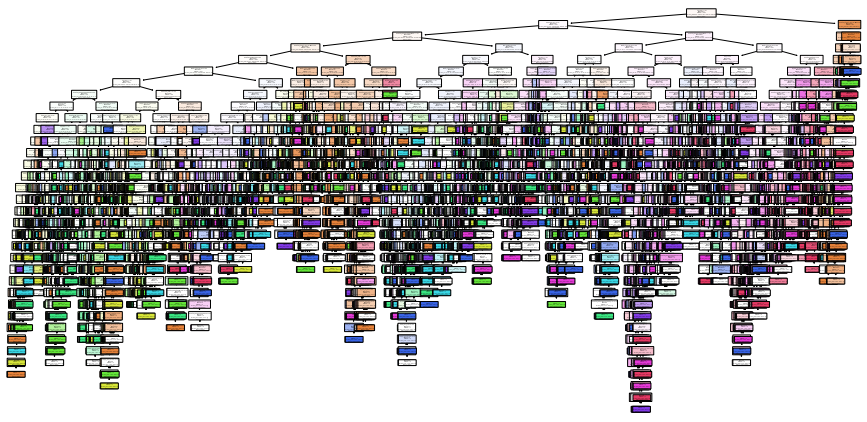

In [16]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
         filled = True,
         rounded = True,
         class_names = ['[75.000-', '-10.000)', '[50.000-75.000)', '[30.000-40.000)',
       '[10.000-15.000)', '[20.000-25.000)', '[40.000-50.000)',
       '[25.000-30.000)', '[15.000-20.000)'],
         feature_names = X_encoded.columns);

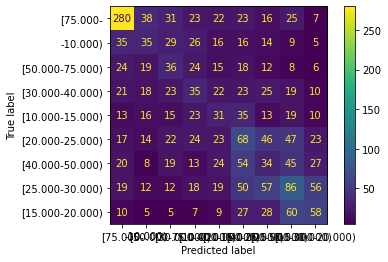

In [17]:
# let's check the classification accuracy for the test data
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels = ['[75.000-', '-10.000)', '[50.000-75.000)', '[30.000-40.000)',
       '[10.000-15.000)', '[20.000-25.000)', '[40.000-50.000)',
       '[25.000-30.000)', '[15.000-20.000)'])

In [18]:
# acccuracy score
from sklearn.metrics import classification_report
y_pred = clf_dt.predict(X_test)
print(classification_report(y_pred,y_test))

                 precision    recall  f1-score   support

       -10.000)       0.60      0.64      0.62       439
[10.000-15.000)       0.19      0.21      0.20       165
[15.000-20.000)       0.22      0.19      0.20       192
[20.000-25.000)       0.18      0.18      0.18       193
[25.000-30.000)       0.18      0.17      0.17       181
[30.000-40.000)       0.24      0.22      0.23       314
[40.000-50.000)       0.14      0.14      0.14       245
[50.000-75.000)       0.26      0.27      0.27       318
       [75.000-       0.28      0.29      0.28       202

       accuracy                           0.29      2249
      macro avg       0.25      0.26      0.25      2249
   weighted avg       0.29      0.29      0.29      2249



In [19]:
# as one can see, there are a lot of misclassification
# with pruning, we can optimize our tree so that there is a better accuracy score

In [20]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) #determine values for alpha
ccp_alphas = path.ccp_alphas #extract different values for alpha
ccp_alphas = ccp_alphas[:-1] #exclude the maximum value for alpha because we don't want just the root of the tree
# we also exclude all the values equal or lower than 0 because alpha has to be greater than zero 
ccp_alphas_to_remove = []

for i in range(0,len(ccp_alphas)): 
    if ccp_alphas[i] <= 0:
        ccp_alphas_to_remove.append(i)

print(ccp_alphas_to_remove)

ccp_alphas = np.delete(ccp_alphas,ccp_alphas_to_remove).tolist()

print(ccp_alphas)

clf_dts = [] # create an array where we can put our different decision trees into (with different alphas)

# now create one decision tree per value fpr alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[7.060950121448399e-06, 9.885330170027662e-06, 9.885330170027716e-06, 1.0334663359574248e-05, 1.2356662712534523e-05, 1.2356662712534604e-05, 1.2709710218606978e-05, 1.2709710218606978e-05, 1.4827995255041465e-05, 1.4827995255041465e-05, 1.4827995255041465e-05, 1.647555028337958e-05, 1.7973327581868328e-05, 1.9770660340055337e-05, 2.118285036434509e-05, 2.1182850364345144e-05, 2.4713325425069154e-05, 2.4713325425069154e-05, 2.4713325425069154e-05, 2.4713325425069208e-05, 2.4713325425069208e-05, 2.4713325425069208e-05, 2.4713325425069208e-05, 2.4713325425069208e-05, 2.4713325425069208e-05, 2.4713325425069262e-05, 2.6735324778029402e-05, 2.8243800485793435e-05, 2.9655990510082985e-05, 2.9655990510083012e-05, 3.177427554651761e-05, 3.177427554651761e-05, 3.2127323052589954e-05, 3.295110056675873e-05, 3.4598655595096924e-05, 3.5304750607241726e-05, 3.5625702885489245e-05, 3.706998813760373e-05, 3.7069988137603785e-05, 3.7069988137603785e-05, 3.7069988137603785e-

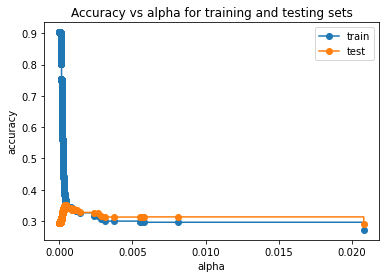

In [21]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

In [ ]:
# As one can see, the best classification accuracy possible is around 35%. This might be because there are too much features
# So, what I will do is only use the columns used for our hypotheses and group by y table to have only two categories : 
# high income and low income

In [50]:
y

0              [75.000-
1              [75.000-
2              [75.000-
3              -10.000)
4              -10.000)
             ...       
8988           -10.000)
8989    [10.000-15.000)
8990           -10.000)
8991    [20.000-25.000)
8992    [30.000-40.000)
Name: Income, Length: 8993, dtype: object

In [51]:
y.value_counts()

-10.000)           1745
[50.000-75.000)    1308
[30.000-40.000)    1110
[40.000-50.000)     969
[75.000-            884
[20.000-25.000)     813
[10.000-15.000)     775
[25.000-30.000)     722
[15.000-20.000)     667
Name: Income, dtype: int64

In [52]:
y.replace(to_replace=('-10.000)','[30.000-40.000)','[20.000-25.000)','[10.000-15.000)','[25.000-30.000)','[15.000-20.000)'), value='low income', inplace=True)

In [54]:
y.replace(to_replace=('[50.000-75.000)','[40.000-50.000)','[75.000-'), value='high income', inplace=True)

In [55]:
y.value_counts()

low income     5832
high income    3161
Name: Income, dtype: int64

In [57]:
#now that this is done, we will drop the columns from the X dataframe
#to keep only the columns used for hypotheses
X.columns

Index(['Sex', 'Marital_status', 'Age', 'Education', 'Occupation',
       'Years_in_area', 'Dual_income', 'Household_size', 'N_under_18',
       'Householder', 'Home_type', 'Ethnic_class', 'Language'],
      dtype='object')

In [62]:
X = X.drop(['Marital_status', 'Age','Years_in_area', 'Dual_income', 'Household_size', 'N_under_18',
       'Householder','Language'], axis = 1)

In [63]:
X.columns

Index(['Sex', 'Education', 'Occupation', 'Home_type', 'Ethnic_class'], dtype='object')

In [64]:
# Now, we redo all the same steps as above

In [65]:
X_encoded = pd.get_dummies(X, columns = ['Sex',
                        'Education',
                        'Occupation',
                        'Home_type',
                        'Ethnic_class',
                        ])

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train)

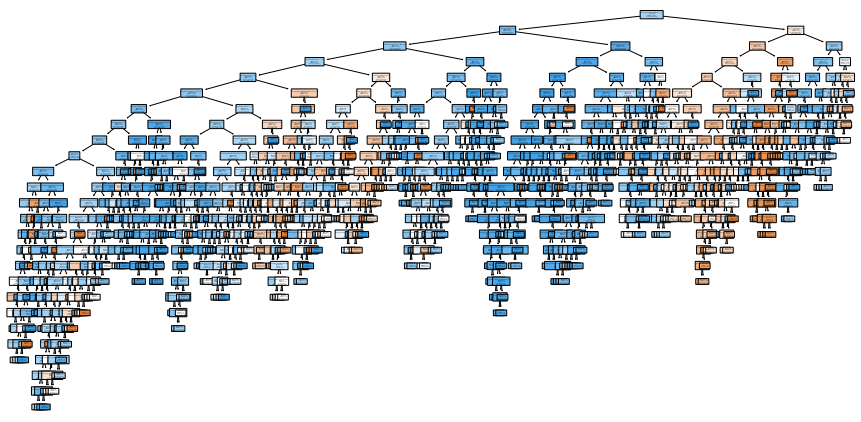

In [67]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
         filled = True,
         rounded = True,
         class_names = ['low income','high income'],
         feature_names = X_encoded.columns);

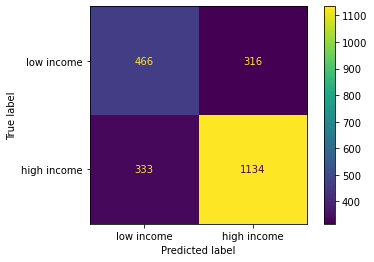

In [68]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels = ['low income','high income'])

In [69]:
y_pred = clf_dt.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

 high income       0.60      0.58      0.59       799
  low income       0.77      0.78      0.78      1450

    accuracy                           0.71      2249
   macro avg       0.68      0.68      0.68      2249
weighted avg       0.71      0.71      0.71      2249



In [70]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) #determine values for alpha
ccp_alphas = path.ccp_alphas #extract different values for alpha
ccp_alphas = ccp_alphas[:-1] #exclude the maximum value for alpha because we don't want just the root of the tree
# we also exclude all the values equal or lower than 0 because alpha has to be greater than zero 
ccp_alphas_to_remove = []

for i in range(0,len(ccp_alphas)): 
    if ccp_alphas[i] <= 0:
        ccp_alphas_to_remove.append(i)

print(ccp_alphas_to_remove)

ccp_alphas = np.delete(ccp_alphas,ccp_alphas_to_remove).tolist()

print(ccp_alphas)

clf_dts = [] # create an array where we can put our different decision trees into (with different alphas)

# now create one decision tree per value fpr alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[1.0842021724855044e-19, 1.0842021724855044e-19, 2.168404344971009e-19, 9.03148672515286e-09, 5.1131018120875726e-08, 7.720791871113075e-08, 1.4977772984934093e-07, 1.7393542821157477e-07, 1.8460000317547728e-07, 5.431500093417384e-07, 5.823746224604964e-07, 5.864576512826583e-07, 6.004249068023576e-07, 6.124551718245889e-07, 6.336750108993814e-07, 6.597550725268779e-07, 6.619640738865853e-07, 7.126274302535207e-07, 7.604100130790842e-07, 8.237775141688814e-07, 8.986663790935519e-07, 9.411015013359447e-07, 1.0369227451078027e-06, 1.081677465414061e-06, 1.123332973866696e-06, 1.3239281477712191e-06, 1.6294500280269499e-06, 1.6322526596535079e-06, 1.6648977128469467e-06, 1.6799616968728344e-06, 1.7282045751800326e-06, 1.9010250326974938e-06, 2.1182850364342976e-06, 2.1182850364348397e-06, 2.4159573388526923e-06, 2.6167050450072297e-06, 2.66307386045982e-06, 2.695999137280222e-06, 2.695999137280222e-06, 2.8243800485793164e-06, 2.8243800485793164e-06, 3.11076823

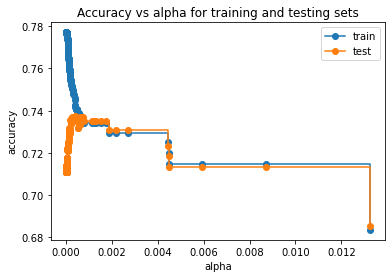

In [71]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

In [72]:
# a good value for alpha would be around 0.000015
# now we do cross validation for finding the best alpha

<AxesSubplot:xlabel='tree'>

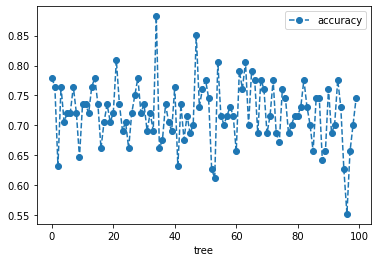

In [74]:
clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.000015)

# now use 100 folds to create 100 different training and testing datasets that are then
# used to train and test the tree

scores = cross_val_score(clf_dt, X_train, y_train, cv = 100)
df = pd.DataFrame(data={'tree':range(100), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<AxesSubplot:xlabel='alpha'>

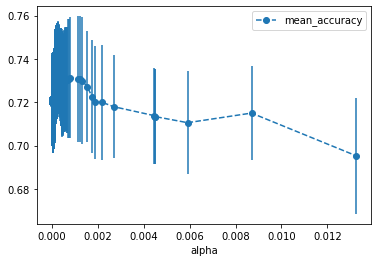

In [77]:
alpha_loop_values = [] #to store each of the folds during cross validation

# for each value of alpha, we will do 100 fold cv and store the mean and SD in arrays that we will plot
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=25)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values,
                        columns = ['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                  y='mean_accuracy',
                  yerr='std',
                  marker='o',
                  linestyle='--')

In [88]:
a = alpha_results['mean_accuracy'].max()

In [91]:
alpha_results[alpha_results['mean_accuracy'] == a]['alpha']

398    0.000251
Name: alpha, dtype: float64

In [92]:
#storing this value
ideal_ccp_alpha = alpha_results[alpha_results['mean_accuracy'] == a]['alpha']
ideal_ccp_alpha

398    0.000251
Name: alpha, dtype: float64

In [93]:
#convert series to a float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.00025144224432480664

In [94]:
clf_dt_pruned = DecisionTreeClassifier(random_state = 42,
                                      ccp_alpha = ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

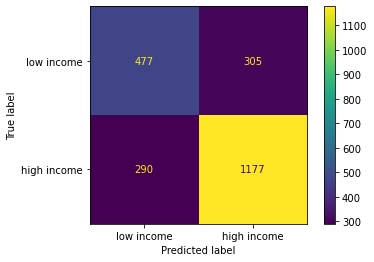

In [95]:
plot_confusion_matrix(clf_dt_pruned,
                     X_test,
                     y_test,
                     display_labels = ["low income", "high income"])

In [97]:
y_pred = clf_dt_pruned.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

 high income       0.61      0.62      0.62       767
  low income       0.80      0.79      0.80      1482

    accuracy                           0.74      2249
   macro avg       0.71      0.71      0.71      2249
weighted avg       0.74      0.74      0.74      2249



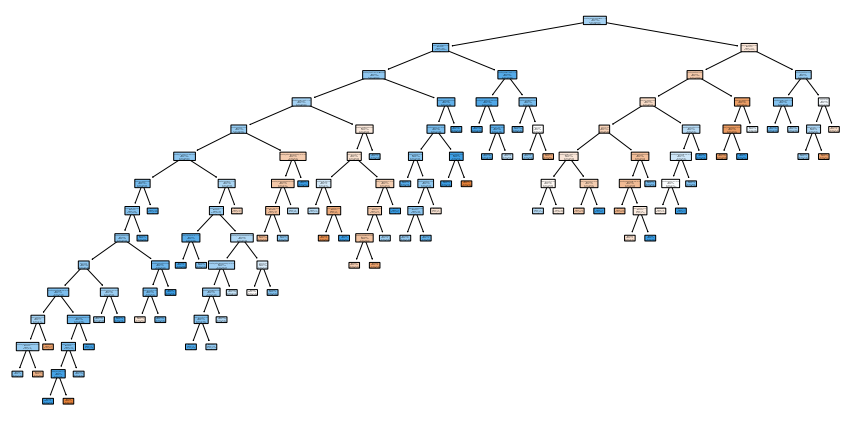

In [96]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,
         filled=True,
         rounded = True,
         class_names = ["low income", "high income"],
         feature_names = X_encoded.columns);

In [ ]:
# the final classification accuracy is 74%.

In [98]:
# apprentissage non-supervisé
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [188]:
data = df_no_missing.drop(['Marital_status', 'Age','Years_in_area', 'Dual_income', 'Household_size', 'N_under_18',
       'Householder','Language'], axis = 1)

In [189]:
data.columns

Index(['Income', 'Sex', 'Education', 'Occupation', 'Home_type',
       'Ethnic_class'],
      dtype='object')

In [190]:
data['Income'].replace(to_replace=('-10.000)','[30.000-40.000)','[20.000-25.000)','[10.000-15.000)','[25.000-30.000)','[15.000-20.000)'), value='low income', inplace=True)
data['Income'].replace(to_replace=('[50.000-75.000)','[40.000-50.000)','[75.000-'), value='high income', inplace=True)

In [216]:
data.head()

,Income,Sex,Education,Occupation,Home_type,Ethnic_class
0,high income,F,1 to 3 years of college,Homemaker,House,White
1,high income,M,College graduate,Homemaker,House,White
2,high income,F,College graduate,Professional/Managerial,Apartment,White
3,low income,F,Grades 9 to 11,"Student, HS or College",House,White
4,low income,F,Grades 9 to 11,"Student, HS or College",House,White


In [219]:
gle = LabelEncoder()
income_labels = gle.fit_transform(data['Income'])
income_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
income_mappings

{0: 'high income', 1: 'low income'}

In [220]:
data['IncomeLabel'] = income_labels

In [221]:
data.head()

,Income,Sex,Education,Occupation,Home_type,Ethnic_class,IncomeLabel
0,high income,F,1 to 3 years of college,Homemaker,House,White,0
1,high income,M,College graduate,Homemaker,House,White,0
2,high income,F,College graduate,Professional/Managerial,Apartment,White,0
3,low income,F,Grades 9 to 11,"Student, HS or College",House,White,1
4,low income,F,Grades 9 to 11,"Student, HS or College",House,White,1


In [223]:
sex_labels = gle.fit_transform(data['Sex'])
sex_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
data['SexLabel'] = sex_labels

In [222]:
occupation_labels = gle.fit_transform(data['Occupation'])
occupation_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
data['OccupationLabel'] = income_labels

In [224]:
hometype_labels = gle.fit_transform(data['Home_type'])
hometype_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
data['HomeTypeLabel'] = hometype_labels

In [256]:
ethnic_class_labels = gle.fit_transform(data['Ethnic_class'])
ethnic_class_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
data['Ethnic_ClassLabel'] = ethnic_class_labels

In [257]:
data['Education'].unique()

array(['1 to 3 years of college', 'College graduate', 'Grades 9 to 11',
       'Graduated High Scool', 'Grad Study', 'Grade 8 or less'],
      dtype=object)

In [258]:
edu_ord_map = {'Grade 8 or less': 1, 'Grades 9 to 11': 2, 'Graduated High Scool': 3, 
               '1 to 3 years of college': 4, 'College graduate': 5, 'Grad Study': 6}
data['EducationLabel'] = data['Education'].map(edu_ord_map)
data.columns

Index(['Income', 'Sex', 'Education', 'Occupation', 'Home_type', 'Ethnic_class',
       'IncomeLabel', 'OccupationLabel', 'SexLabel', 'HomeTypeLabel',
       'Ethnic_ClassLabel', 'EducationLabel'],
      dtype='object')

In [259]:
data_encoded = data.drop(['Income', 'Sex', 'Education', 'Occupation', 'Home_type', 'Ethnic_class'],axis = 1)

In [260]:
data_encoded.columns

Index(['IncomeLabel', 'OccupationLabel', 'SexLabel', 'HomeTypeLabel',
       'Ethnic_ClassLabel', 'EducationLabel'],
      dtype='object')

In [284]:
data_encoded.head()

,IncomeLabel,OccupationLabel,SexLabel,HomeTypeLabel,Ethnic_ClassLabel,EducationLabel
0,0,0,0,2,7,4
1,0,0,1,2,7,5
2,0,0,0,0,7,5
3,1,1,0,2,7,2
4,1,1,0,2,7,2


In [285]:
true_label_names = ('low income','high income')

In [286]:
label_encoder = LabelEncoder()

In [287]:
true_labels = label_encoder.fit_transform(data['Income'])

In [288]:
true_labels[:5]

array([0, 0, 0, 1, 1])

In [289]:
label_encoder.classes_

array(['high income', 'low income'], dtype=object)

In [290]:
n_clusters = len(label_encoder.classes_)
n_clusters

2

In [291]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

In [292]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [293]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [294]:
pipe.fit(data_encoded)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=2, n_init=50,
                                         random_state=42))]))])

In [295]:
preprocessed_data = pipe["preprocessor"].transform(data_encoded)

In [296]:
predicted_labels = pipe["clusterer"]["kmeans"].labels_

In [297]:
silhouette_score(preprocessed_data, predicted_labels)

0.6699255046388508

In [298]:
adjusted_rand_score(true_labels, predicted_labels)

1.0

In [302]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data_encoded),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

In [303]:
import seaborn as sns

C:\Users\Lisane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


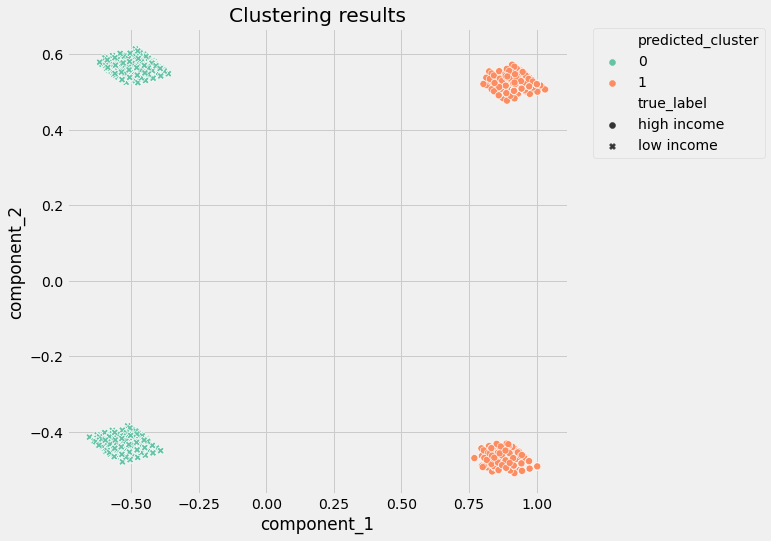

In [304]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()